In [1]:


# MArk : This plot demonstrates that cells within clones have closer gene expression profiles than non-related cells
# Michael : ..and, further, that this is true even when one controls for the same xy distance...?



library(dplyr)

aa<-read.csv("/home/agranado/Downloads/flyData_filtered_clustered_jupyter_15Nov_ALL_Cells.txt")

aa <- aa %>% filter(clone_id>0 & clust_label >=0)
n_clones= length(unique(aa$clone_id))



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:

all_dists = list()
all_dists_umap = list()
array_dist = c()
array_umap_dist = c()

for(i in 1:n_clones){
  
  aa %>% filter(clone_id ==i) ->this_clone 
  
  this_clone %>% select(ypos,xpos) %>% dist() -> all_dists[[i]]
  this_clone %>% select(umap_1,umap_2) %>% dist() -> all_dists_umap[[i]] 
  
  array_dist = c(array_dist,as.matrix(all_dists[[i]])[all_dists[[i]] %>% as.matrix() %>% lower.tri()])
  array_umap_dist = c(array_umap_dist,as.matrix(all_dists_umap[[i]])[all_dists_umap[[i]] %>% as.matrix() %>% lower.tri()])
  
  }



In [3]:
length(array_umap_dist)

[1] 9958

In [4]:
length(array_dist)

[1] 9958

In [5]:
dim(aa)

[1] 525  19

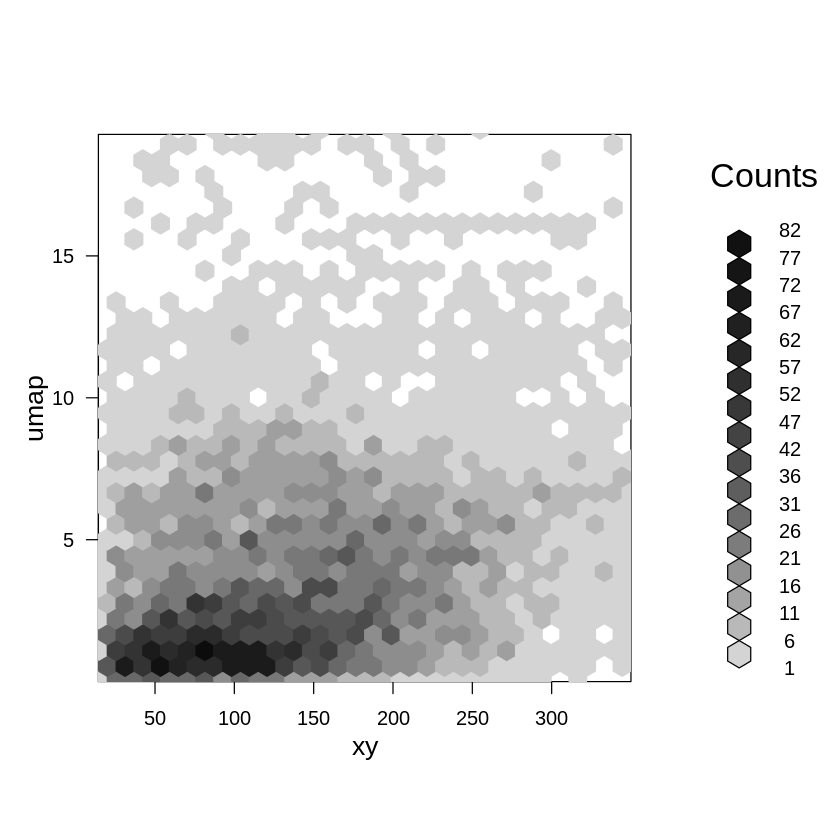

In [6]:
library(hexbin)

df_dist = data.frame(xy = array_dist,umap = array_umap_dist)
h<-hexbin(df_dist %>% filter(xy<350))
plot(h)

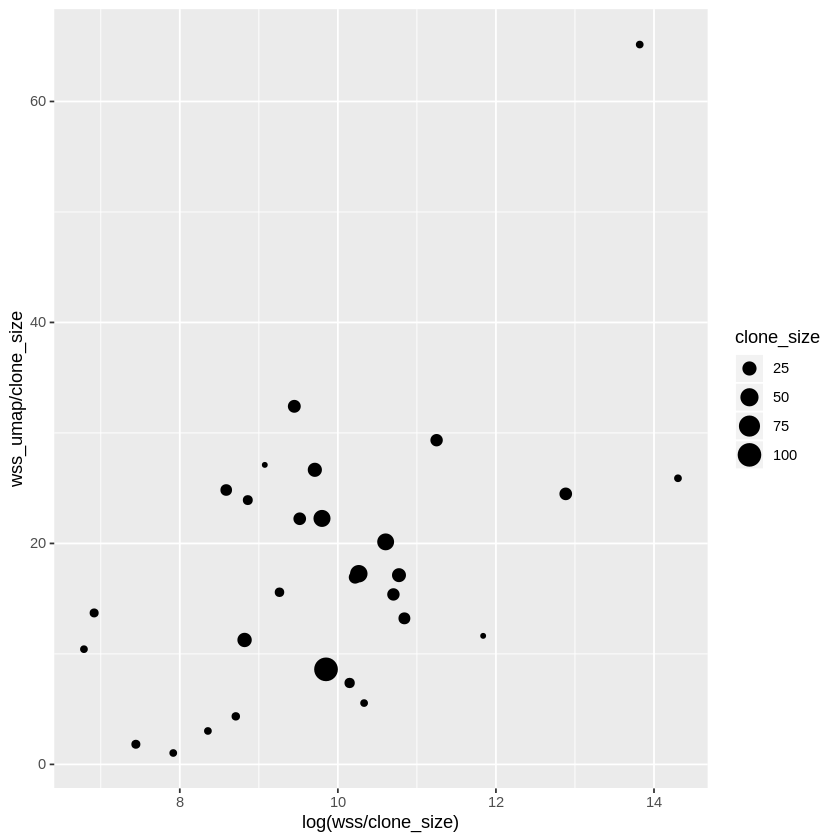

In [8]:
# notes, let's compute the within sum squares error for each clone in both umap and XY space and see how tight they are in each space. 
# Expectation: even for clones with large within sum error in XY space, the WSS will be small in UMAP space 
# As long as they are clones, that is why we are grouping the data. 

library(ggplot2)

wss = c()
wss_umap = c()
clone_size = c()
for (i in 1:n_clones){
    
    aa %>% filter(clone_id ==i) ->this_clone 
    
    this_clone %>% select(ypos,xpos) -> xy
    this_clone %>% select(umap_1,umap_2) -> xy_umap
    
    mean_clone =apply(xy,2,mean)
    mean_umap =apply(xy_umap,2,mean)
    
    wss[i] = sum(  (xy$ypos - mean_clone[1])^2 + (xy$xpos - mean_clone[2])^2     ) 
    
    
    wss_umap[i] =sum(    (xy_umap$umap_1 - mean_umap[1])^2 + (xy_umap$umap_2 - mean_umap[2])^2  ) 
    
    clone_size[i] = dim(xy)[1]
}

df = data.frame(size = clone_size, wss= wss, wss_umap = wss_umap)

df  %>% ggplot(aes(x = log(wss/clone_size),y =wss_umap/clone_size,size = clone_size)) + geom_point()

